<a href="https://colab.research.google.com/github/rullvgs/challlenge-1-ruta-ds/blob/main/challenge1_ruta_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [68]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


In [ ]:
#pd.set_option('display.float_format', '{:,.8f}'.format)
#pd.reset_option('display.float_format')

In [69]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)

In [70]:
df.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
1349,Refrigerador,Electrodomésticos,1428100.0,76700.0,2022-04-20,Mariana Herrera,Cúcuta,5,Nequi,1,7.89391,-72.50782,Tienda 1
8556,Smart TV,Electrónicos,1669100.0,89300.0,2022-08-11,Juan Fernandez,Bogotá,5,Tarjeta de crédito,10,4.60971,-74.08175,Tienda 4
4854,Bicicleta,Deportes y diversión,476200.0,25600.0,2022-03-31,Juan Fernandez,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 3
1093,Impresora,Electrónicos,365200.0,17600.0,2023-01-16,Pedro Gomez,Bogotá,5,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
4240,Ciencia de datos con Python,Libros,61100.0,3800.0,2020-11-20,Santiago Silva,Medellín,4,Tarjeta de crédito,3,6.25184,-75.56359,Tienda 2
7753,Mesa de comedor,Muebles,248800.0,15600.0,2020-12-28,Maria Alfonso,Bogotá,5,Tarjeta de crédito,12,4.60971,-74.08175,Tienda 4
948,Guitarra acústica,Instrumentos musicales,344100.0,18700.0,2020-04-13,Maria Alfonso,Bogotá,3,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 1
8422,Batería,Instrumentos musicales,777900.0,39600.0,2020-12-13,Lucas Olivera,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 4
6503,Refrigerador,Electrodomésticos,1919200.0,102400.0,2021-04-11,Camila Rivera,Cali,4,Tarjeta de crédito,3,3.43722,-76.52250,Tienda 3
5625,Sofá reclinable,Muebles,612100.0,33000.0,2020-07-21,Lucas Olivera,Barranquilla,4,Tarjeta de crédito,3,10.96854,-74.78132,Tienda 3


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  Tienda                  9435 non-null   object  

#1. Análisis de facturación



In [72]:
ingresos_por_tienda = df.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print('Ingresos totales por tienda:')
ingresos_por_tienda

Ingresos totales por tienda:


,Precio
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [73]:
top_categorias_por_tienda = df.groupby('Tienda')['Categoría del Producto'].value_counts().groupby(level=0).head(5)
top_categorias_df = top_categorias_por_tienda.rename('counts').reset_index()
top_categorias_df

,Tienda,Categoría del Producto,counts
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 2,Muebles,442
6,Tienda 2,Electrónicos,422
7,Tienda 2,Juguetes,313
8,Tienda 2,Electrodomésticos,305
9,Tienda 2,Deportes y diversión,275


# 3. Calificación promedio de la tienda


In [74]:
calificacion_promedio_por_tienda = df.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print('Calificación promedio por tienda:')
calificacion_promedio_por_tienda.round(2)

Calificación promedio por tienda:


,Calificación
Tienda,
Tienda 3,4.05
Tienda 2,4.04
Tienda 4,4.00
Tienda 1,3.98


# 4. Productos más y menos vendidos

In [82]:
top_productos_por_tienda = df.groupby('Tienda')['Producto'].value_counts().groupby(level=0).head(5)
top_productos_df = top_productos_por_tienda.rename('counts').reset_index()
top_productos_df

,Tienda,Producto,counts
0,Tienda 1,Armario,60
1,Tienda 1,Microondas,60
2,Tienda 1,TV LED UHD 4K,60
3,Tienda 1,Secadora de ropa,58
4,Tienda 1,Bloques de construcción,56
5,Tienda 2,Iniciando en programación,65
6,Tienda 2,Microondas,62
7,Tienda 2,Batería,61
8,Tienda 2,Guitarra acústica,58
9,Tienda 2,Pandereta,58


# 5. Envío promedio por tienda

In [83]:
costo_envio_promedio_por_tienda = df.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)
print('Costo de envío promedio por tienda:')
costo_envio_promedio_por_tienda.round(2)

Costo de envío promedio por tienda:


,Costo de envío
Tienda,
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46


# Gráficos

In [ ]:
import matplotlib.pyplot as plt


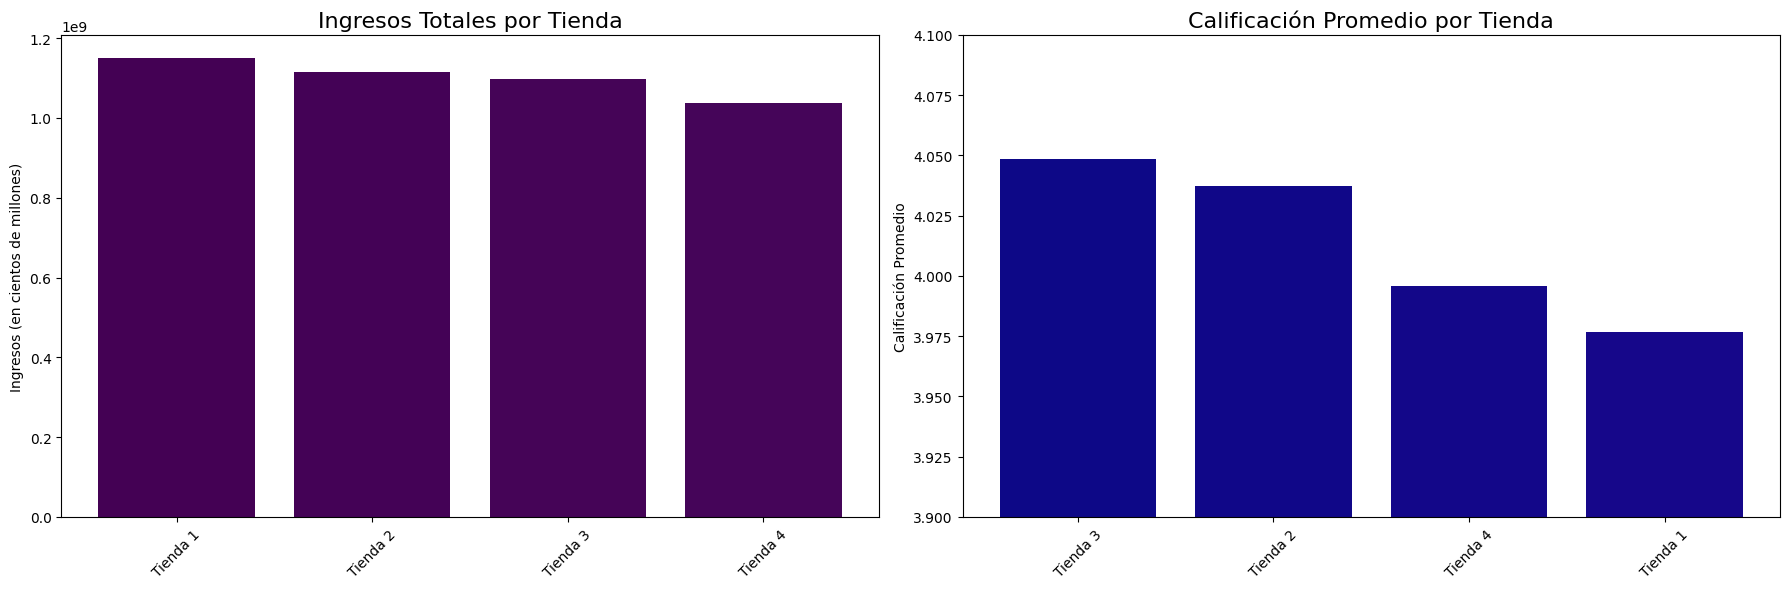

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

viridis_colors = plt.cm.viridis(range(len(ingresos_por_tienda)))
plasma_colors = plt.cm.plasma(range(len(calificacion_promedio_por_tienda)))

# Gráfico de ingresos
axes[0].bar(ingresos_por_tienda.index, ingresos_por_tienda.values, color=viridis_colors)
axes[0].set_title('Ingresos Totales por Tienda', fontsize=16)
axes[0].set_ylabel('Ingresos (en cientos de millones)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de calificaciones
axes[1].bar(calificacion_promedio_por_tienda.index, calificacion_promedio_por_tienda.values, color=plasma_colors)
axes[1].set_title('Calificación Promedio por Tienda', fontsize=16)
axes[1].set_ylabel('Calificación Promedio')
axes[1].set_ylim(3.9, 4.1)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

El indicador más importante del rendimiento de una tienda son sus ingresos totales. Como se puede observar en el gráfico anterior, la Tienda 4 es la que menos ingresos genera, con una diferencia considerable respecto a las otras tres.


La satisfacción del cliente es un factor crucial para el éxito a largo plazo. En este aspecto, las cuatro tiendas mantienen una calificación promedio muy similar, todas alrededor de 4 sobre 5. Sin embargo, la Tienda 1 presenta la calificación más baja, aunque por un margen muy pequeño.

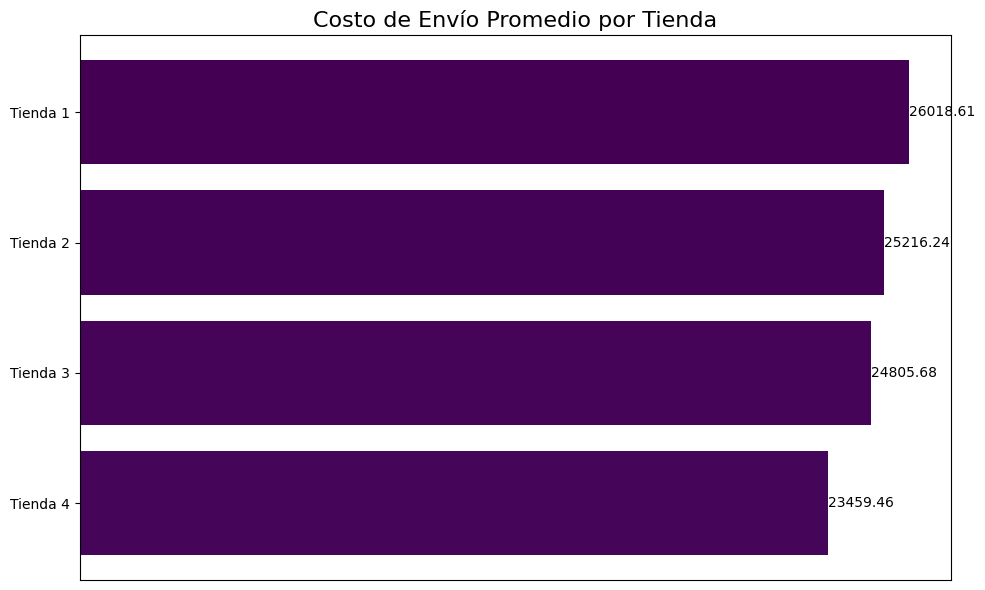

In [87]:
colors = plt.cm.viridis(range(len(costo_envio_promedio_por_tienda)))

plt.figure(figsize=(10, 6))
bars = plt.barh(costo_envio_promedio_por_tienda.index, costo_envio_promedio_por_tienda.values, color=colors)

# Etiquetas al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=10)

plt.title('Costo de Envío Promedio por Tienda', fontsize=16)
plt.xlabel('')
plt.xticks([])
plt.gca().invert_yaxis()
plt.tight_layout()

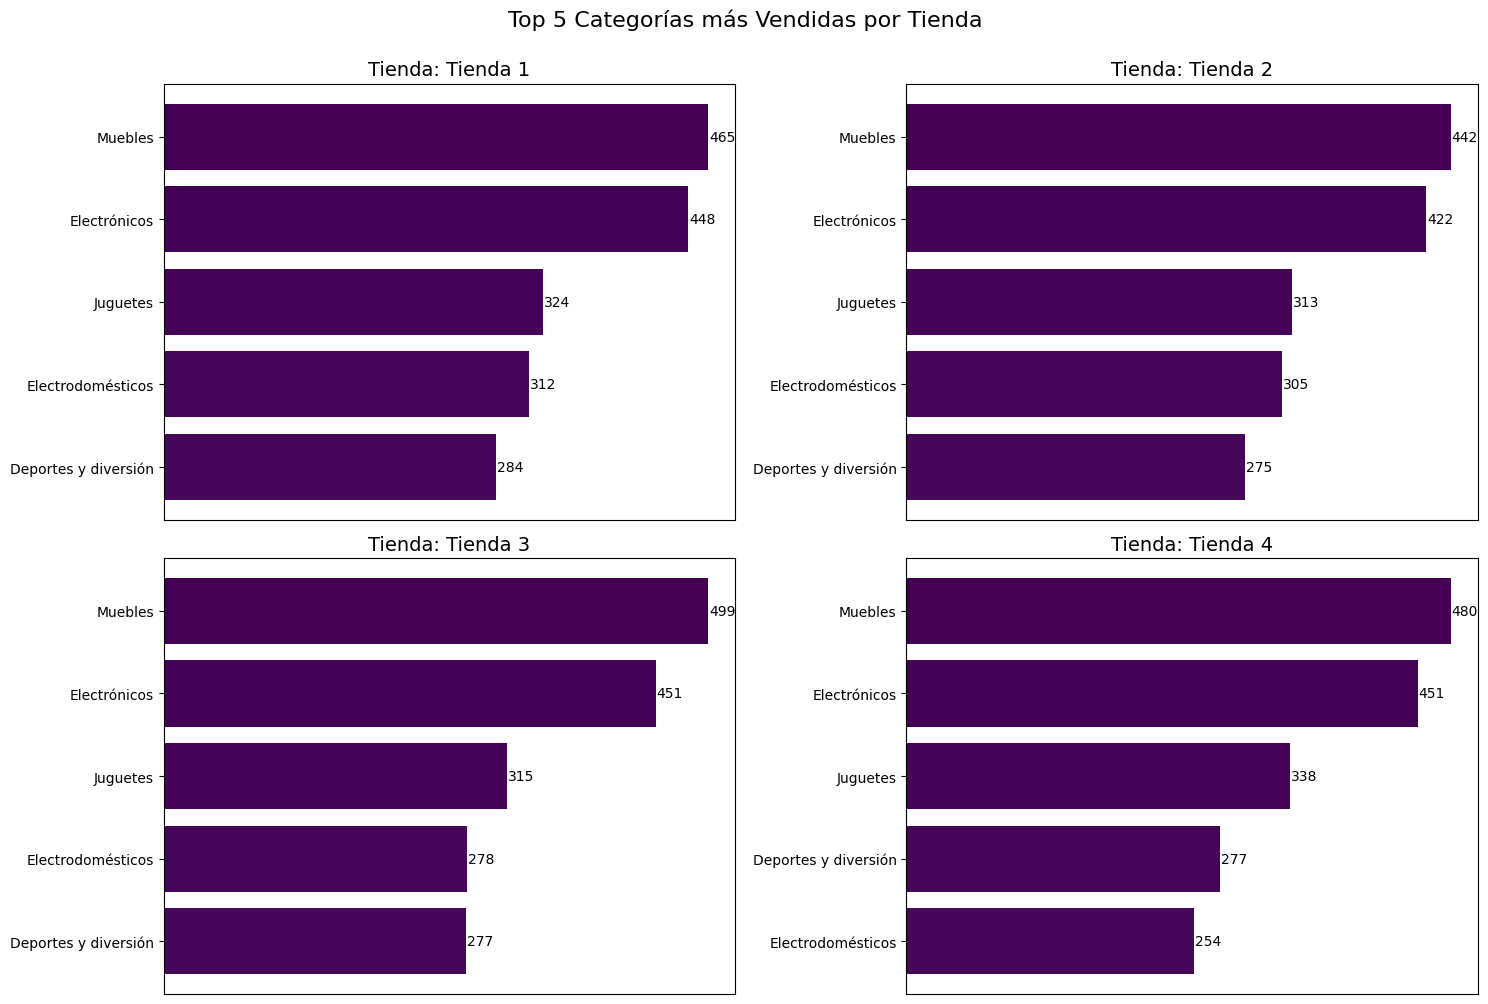

In [81]:
tiendas = top_categorias_df['Tienda'].unique()
num_tiendas = len(tiendas)

fig, axes = plt.subplots(nrows=(num_tiendas + 1) // 2, ncols=2, figsize=(15, 5 * ((num_tiendas + 1) // 2)))
axes = axes.flatten()

colormap = plt.cm.viridis

for i, tienda in enumerate(tiendas):
    # Filtrar datos por tienda
    data = top_categorias_df[top_categorias_df['Tienda'] == tienda]
    colors = colormap(range(len(data)))

    bars = axes[i].barh(data['Categoría del Producto'], data['counts'], color=colors)
    # Agregar etiquetas al final de cada barra
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width + 1, bar.get_y() + bar.get_height() / 2,
                     f'{int(width)}', va='center', fontsize=10)

    axes[i].set_title(f'Tienda: {tienda}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_xticks([])
    axes[i].invert_yaxis()

fig.suptitle('Top 5 Categorías más Vendidas por Tienda', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

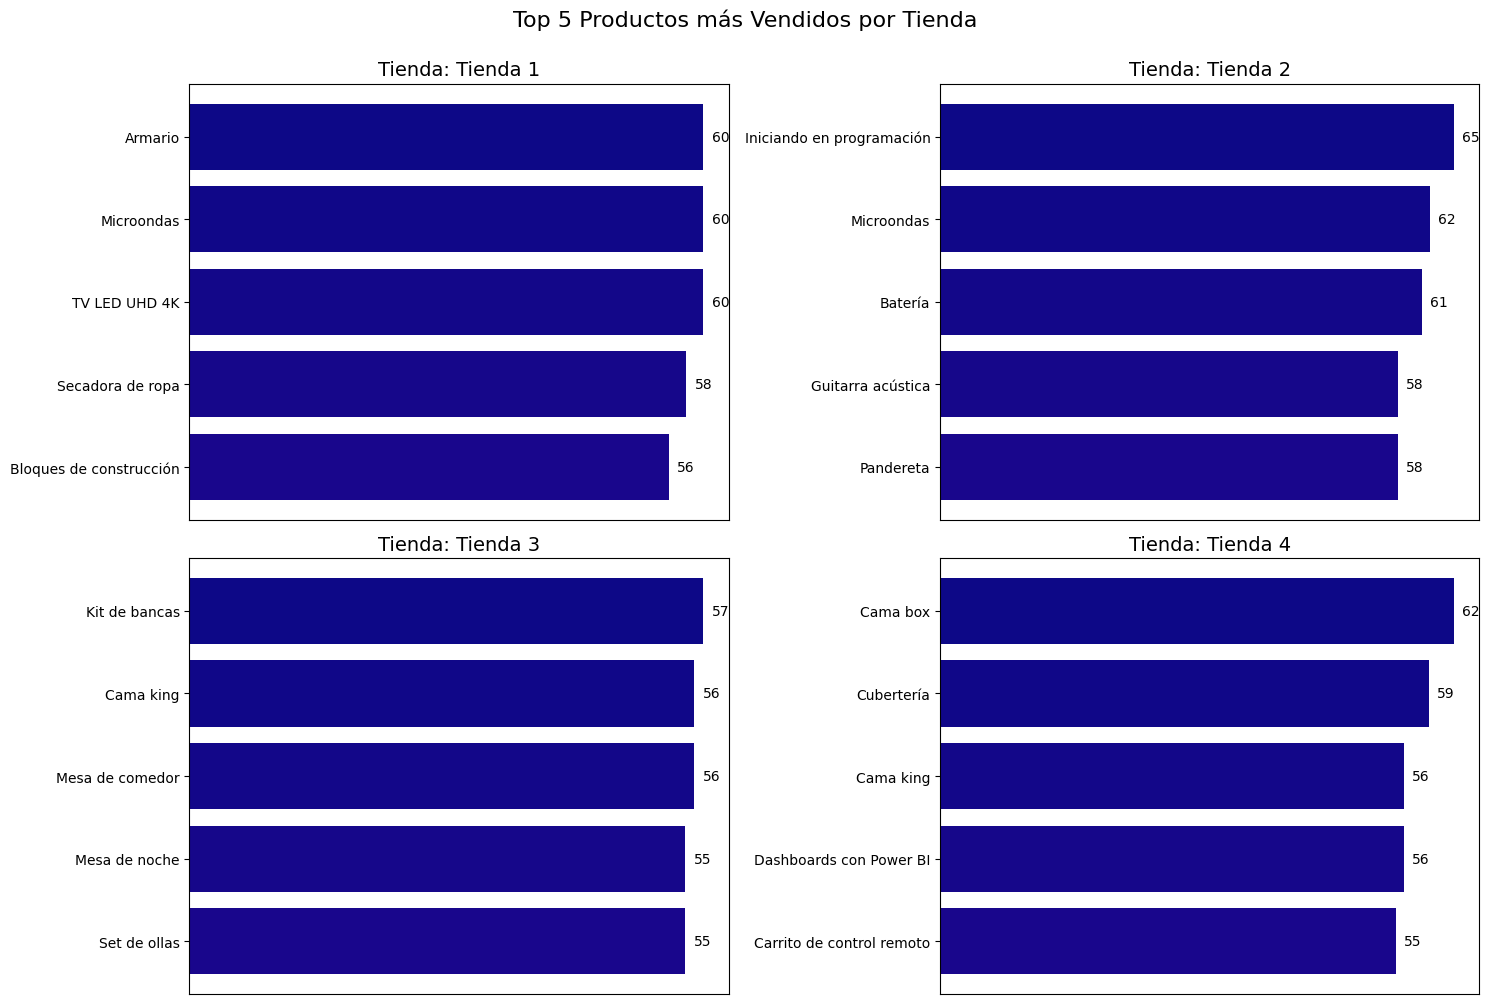

In [85]:
import matplotlib.pyplot as plt

# Lista de tiendas únicas
tiendas = top_productos_df['Tienda'].unique()
num_tiendas = len(tiendas)

# Crear subplots en 2 columnas
fig, axes = plt.subplots(nrows=(num_tiendas + 1) // 2, ncols=2, figsize=(15, 5 * ((num_tiendas + 1) // 2)))
axes = axes.flatten()

# Colormap tipo 'plasma'
colormap = plt.cm.plasma

for i, tienda in enumerate(tiendas):
    # Filtrar datos por tienda
    data = top_productos_df[top_productos_df['Tienda'] == tienda]
    colors = colormap(range(len(data)))

    # Gráfico de barras horizontales
    bars = axes[i].barh(data['Producto'], data['counts'], color=colors)

    # Etiquetas al final de cada barra
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width + 1, bar.get_y() + bar.get_height() / 2,
                     f'{int(width)}', va='center', fontsize=10)

    # Estética del subplot
    axes[i].set_title(f'Tienda: {tienda}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_xticks([])
    axes[i].invert_yaxis()

# Título general
fig.suptitle('Top 5 Productos más Vendidos por Tienda', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

# CONCLUSIÓN Y RECOMENDACIÓN


Basado en el análisis, la Tienda 4 es la que presenta el rendimiento más bajo, principalmente debido a sus bajos ingresos. Aunque las demás tiendas también tienen áreas de mejora, como la calificación de la Tienda 1, su rendimiento general es superior.

Por lo tanto, se recomienda al Sr. Juan proceder con la venta de la Tienda 4 para liberar capital y recursos que puedan ser invertidos en su nuevo proyecto.